In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

In [2]:
neural_data = (loadmat("data/monkeydata_training.mat"))["trial"]

In [3]:
max_time = 1000
trials = 100
neural_units = 98
directions = 8
axes = 3

In [4]:
spikes_data = np.zeros((trials * directions, neural_units, max_time))
arm_data = np.zeros((trials * directions, axes, max_time))

In [5]:
for i in range(directions):
    a = (neural_data[:, i])
    for j in range(trials):
        spikes = (a[j])[1]
        arm = (a[j])[2]
        spikes_data[j + (trials * i), :, :spikes.shape[1]] = spikes
        arm_data[j + (trials * i), :, :arm.shape[1]] = arm
        arm_data[j + (trials * i), :, arm.shape[1]:] = (
            np.repeat([arm[:, -1]], max_time - arm.shape[1], axis=0).T
        )

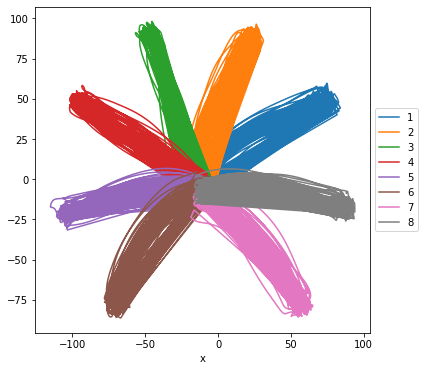

In [6]:
arm_df = pd.DataFrame({
    "direction": np.repeat(np.arange(1, 9), trials * max_time),
    "trial": np.tile(np.repeat(np.arange(1, 101), max_time), directions),
    "x": arm_data[:, 0, :].flatten(),
    "y": arm_data[:, 1, :].flatten(),
    "z": arm_data[:, 2, :].flatten()
})

grouped_arm_df = arm_df.groupby(by="direction")

fig, ax = plt.subplots(figsize=(6, 6))

colors = {
    1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green',
    4: 'tab:red', 5: 'tab:purple', 6: 'tab:brown',
    7: 'tab:pink', 8: 'tab:gray'}


for key, group in grouped_arm_df:
    group.plot(
        ax=ax,
        kind="line",
        x="x",
        y="y",
        label=key,
        color=colors[key])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

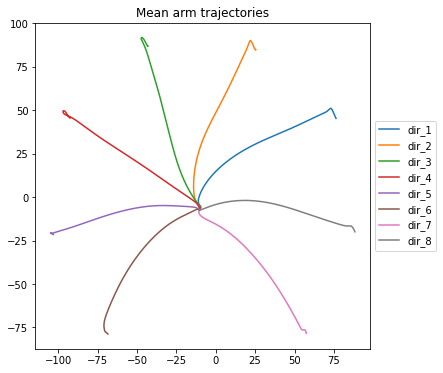

In [7]:
mean_trajectories = {}
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(1, 9):
    mean_trajectories[f"dir_{i}"] = np.mean(
        arm_data[(trials * (i - 1)):(trials * i)], axis=0
    )
    ax.plot(mean_trajectories[f"dir_{i}"][0],
            mean_trajectories[f"dir_{i}"][1],
            color=colors[i], label=f"dir_{i}")
    mean_trajectories[f"dir_{i}"] = (
        mean_trajectories[f"dir_{i}"].reshape(axes * max_time))
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Mean arm trajectories")
plt.show()

In [8]:
print(spikes_data.shape)
print(arm_data.shape)
print(mean_trajectories["dir_1"].shape)

(800, 98, 1000)
(800, 3, 1000)
(3000,)


In [9]:
# out_file = "data/processed/arm_data.pickle"
# with open(out_file, "wb") as f:
#     pickle.dump(arm_data, f)

# out_file = "data/processed/spike_data.pickle"
# with open(out_file, "wb") as f:
#     pickle.dump(spikes_data, f)
    
# out_file = "data/processed/mean_trajectory.pickle"
# with open(out_file, "wb") as f:
#     pickle.dump(mean_trajectories, f)